#CASE STUDY : AIRLINE

Draw the inferences from the Airline data

AIM: Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.Draw the inferences from the clusters obtained.

Data Description:

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


#Draw the inferences from the clusters obtained

Clustering
----
Cluster analysis refers to the grouping of observations so that the objects within eachcluster share similar properties, and properties of all clusters are independent of each
other.

type:

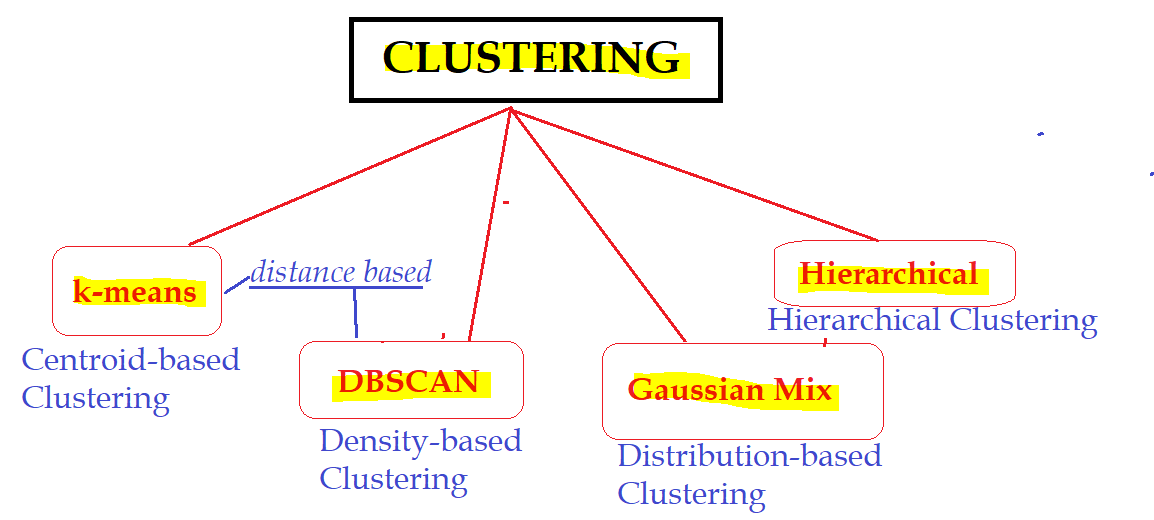

In [ ]:
# Import Libraries

#SET 1 : DATA MANIPULATION AND ANALYSIS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#SET2 : DATA PREPROCESSING
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#SET 2 : ML CLUSTERING SPECIFIC
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch

#SET 4 : CLUSTERING EVALUATION SPECIFIC
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [ ]:
#SET 5 : MISC
# Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
'''#SET 6 : GOOGLE COLLAB SPECIFIC
from google.colab import files
file=files.upload()'''

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [ ]:
# Loading dataset
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
#renaming features
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data=data.iloc[:,1:]
data.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


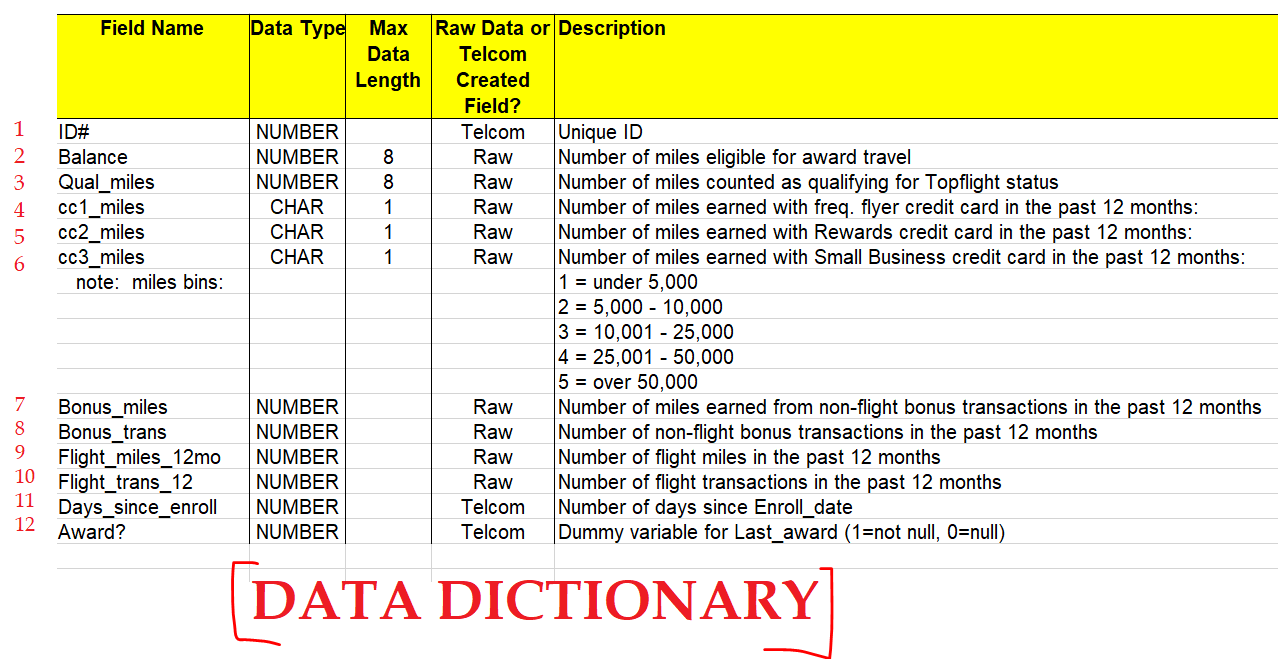

EDA
---

DataSet analysis
----

- data size
- data type
- data shape

In [ ]:
data.shape

(3999, 11)

conclusion

- no of observations = 3999
- no of features = 11

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


DATA CLEANING
----

- missing/null values
- duplicates


In [ ]:
# null/missing
null_count_col = data.isnull().sum().value_counts(ascending=False)
print("Null Count for Columns:", null_count_col)

Null Count for Columns: 0    11
dtype: int64


In [ ]:
# null count for obeservations/rows
null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)
print("Null Count for Rows:", null_count_row)

Null Count for Rows: 0    3999
dtype: int64


conclusion : no null feature  neither null oberservation is recorded

In [ ]:
#DUPLICATES
data.duplicated().sum()

1

In [ ]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [ ]:
data.loc[3897:3900,:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
3897,179832,2954,3,1,1,18218,20,2500,5,1569,1
3898,44324,0,1,1,1,650,4,650,4,1583,0
3899,90666,0,4,1,1,32474,14,0,0,1582,0
3900,10741,0,1,1,1,6593,8,1108,2,1579,1


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()
data.reset_index(inplace=True)

conclusion : 1 duplicate observation , hence dropped and index reset

In [ ]:
data=data.iloc[:,1:]
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


STATISTICAL ANALYSIS
----
- mean
- mode
- median
- range
- variance
- standard deviation

In [ ]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


DATASET ANLYSIS (DATA DISTRIBUTION)
--

In [ ]:
#features list
data.columns


Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

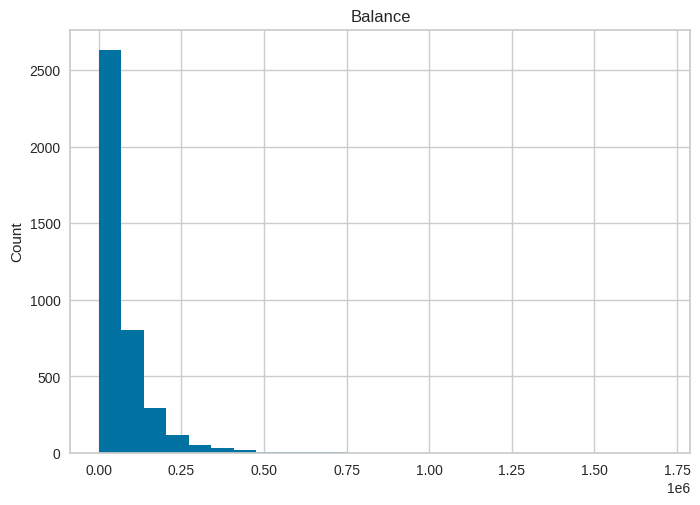

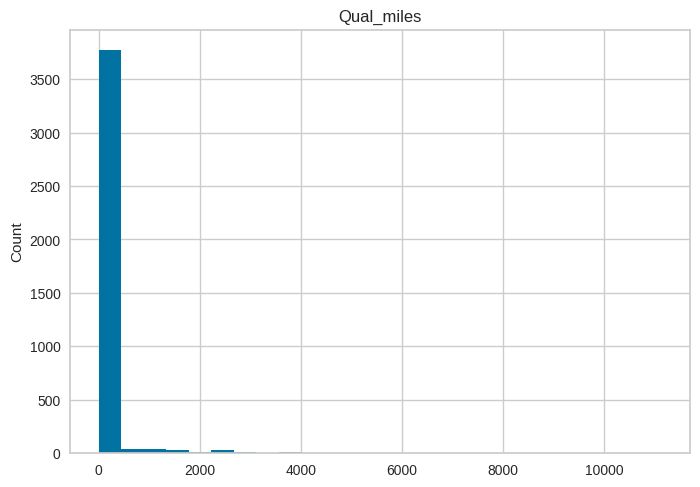

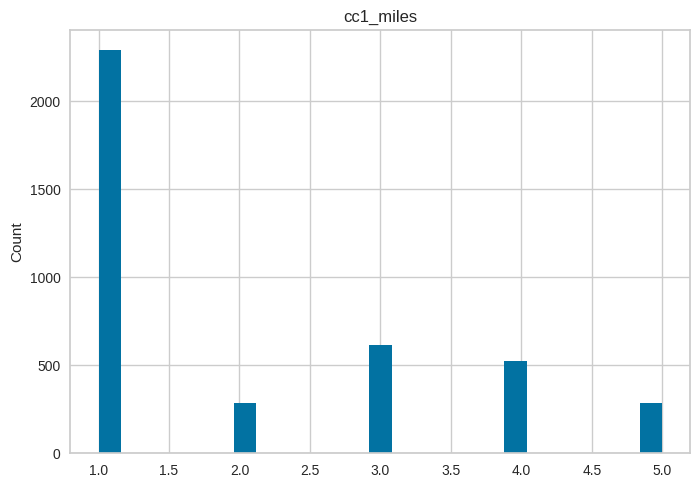

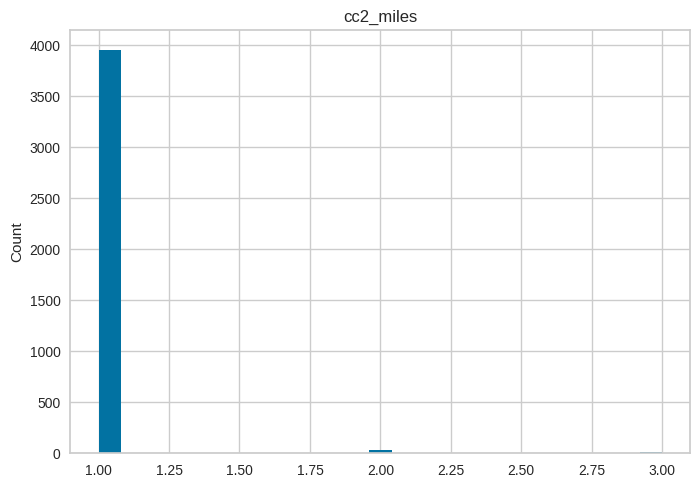

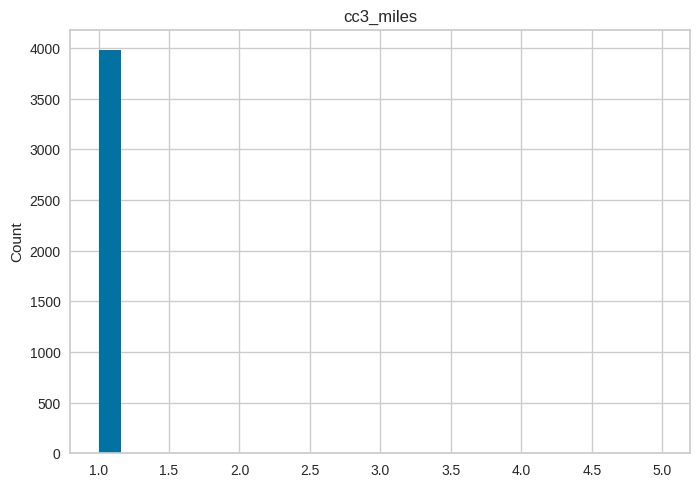

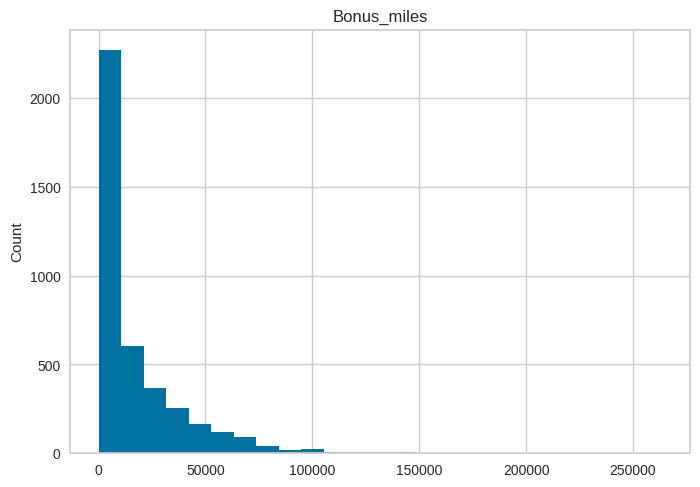

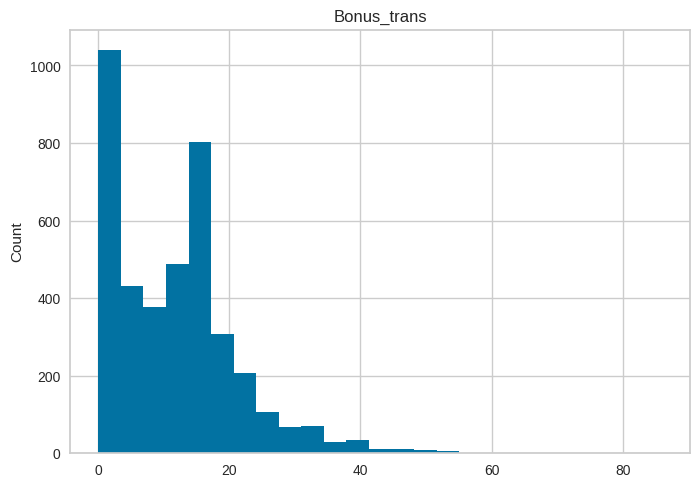

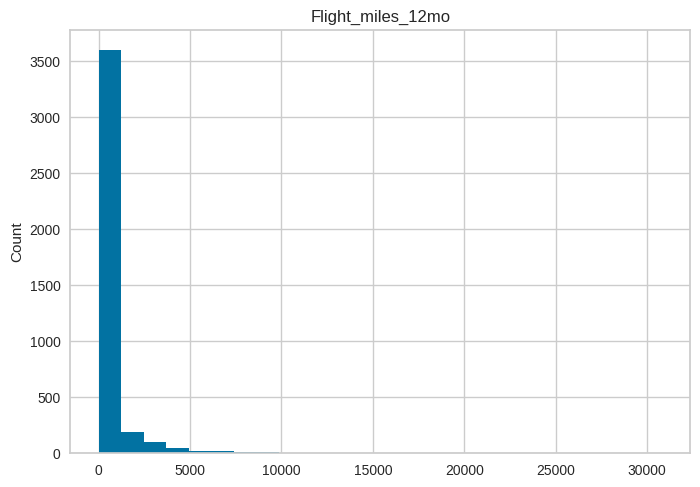

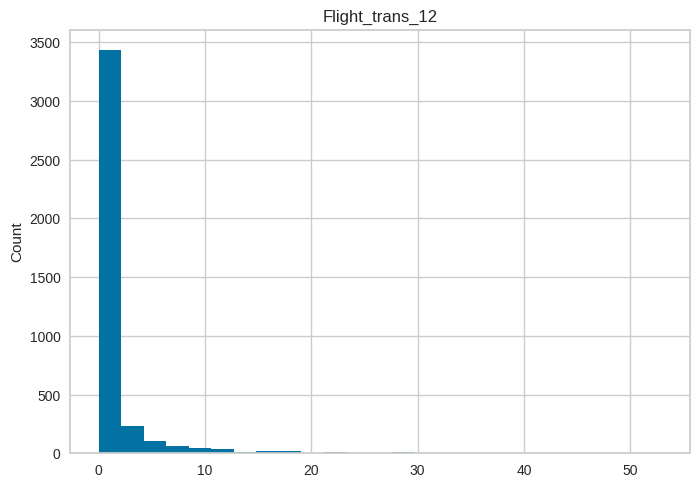

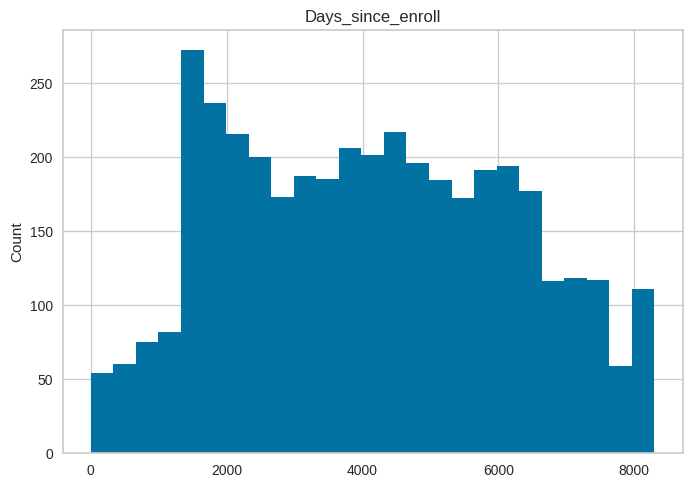

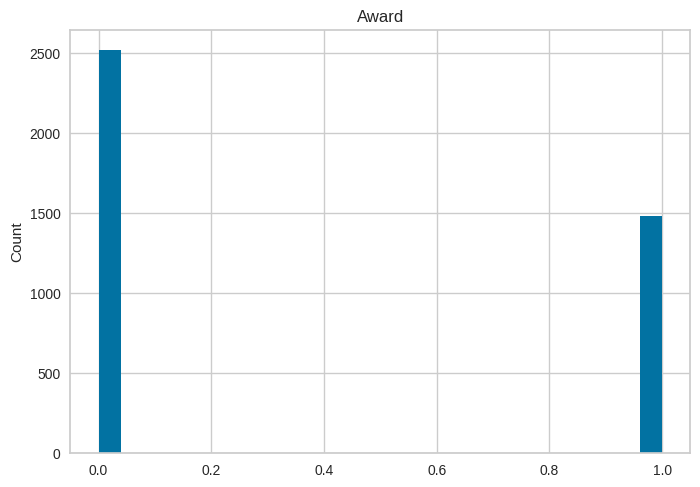

In [ ]:
for i in data.columns:
  if i!='ID':
    data[i].hist(bins=25)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

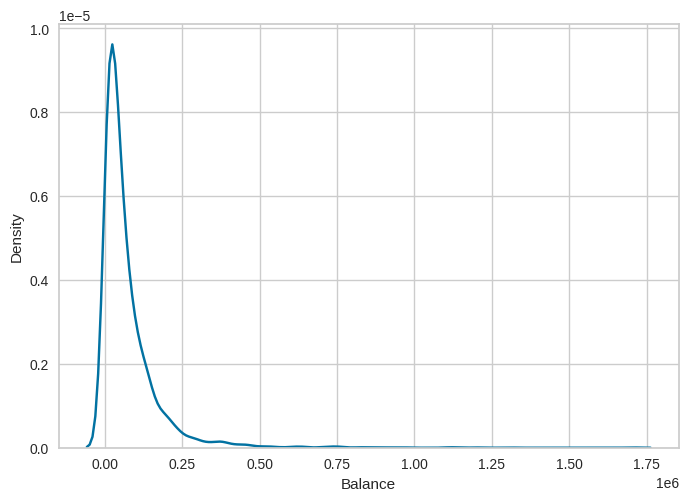

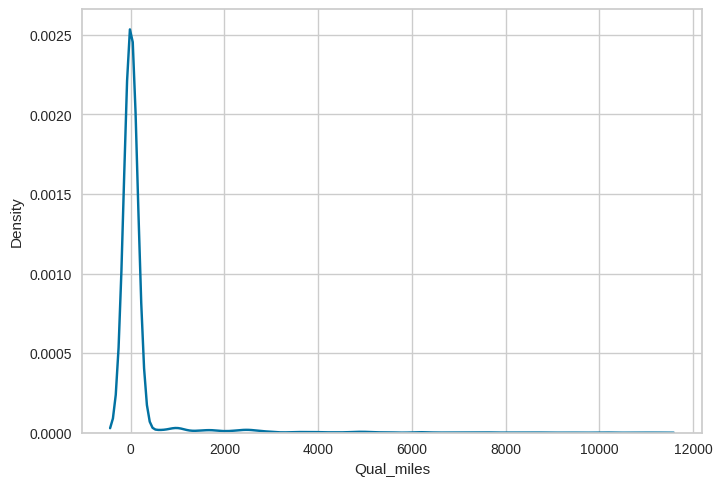

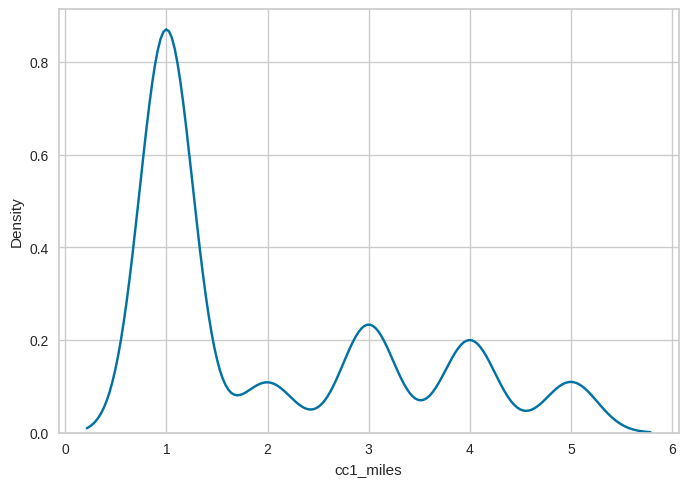

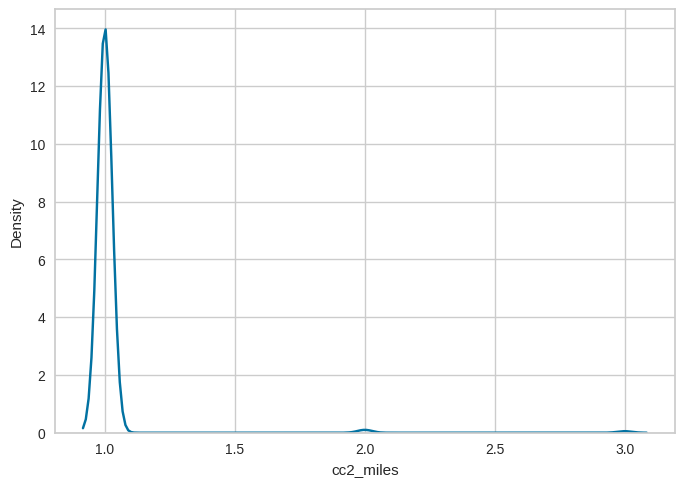

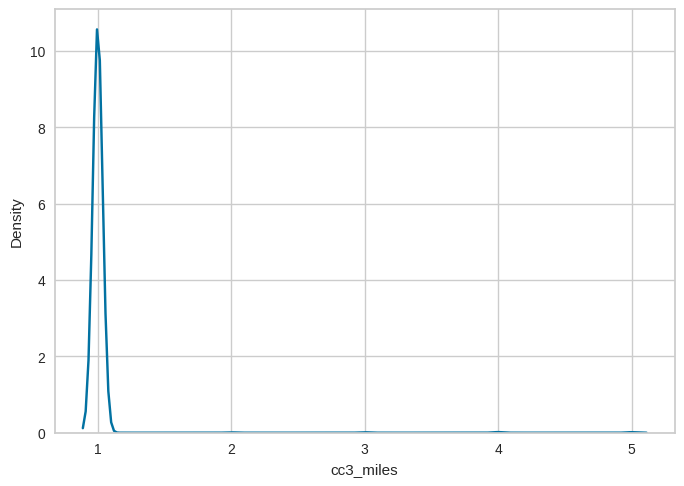

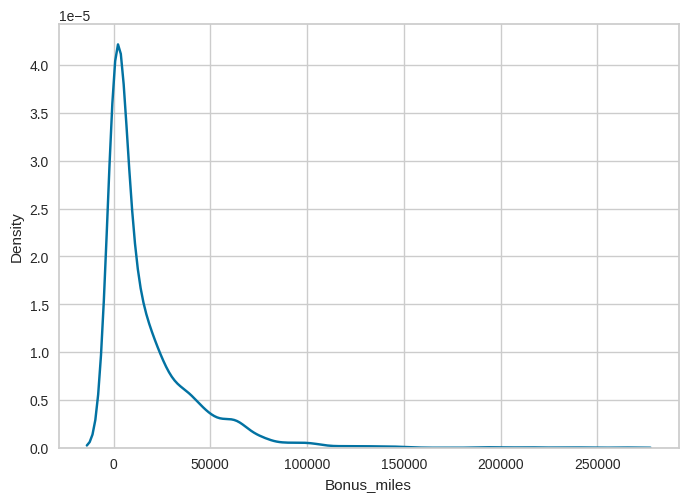

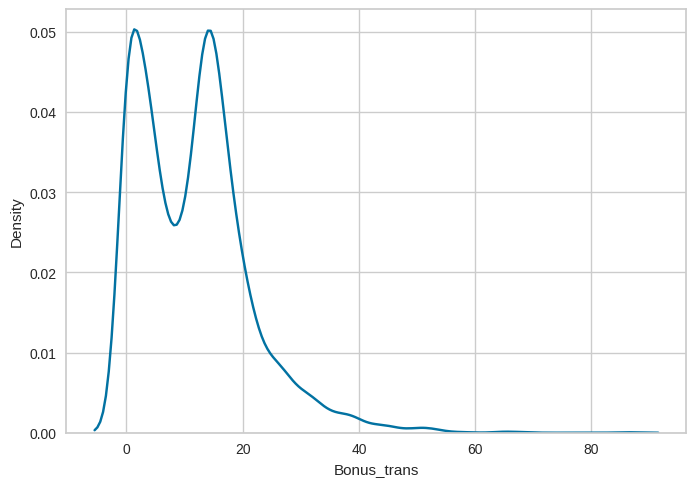

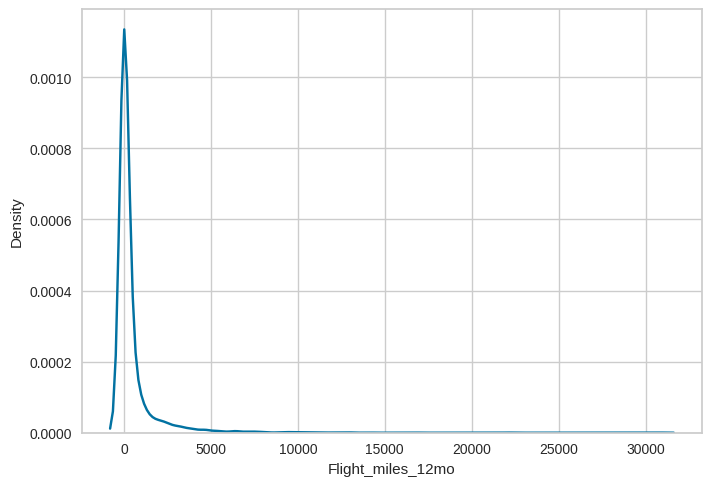

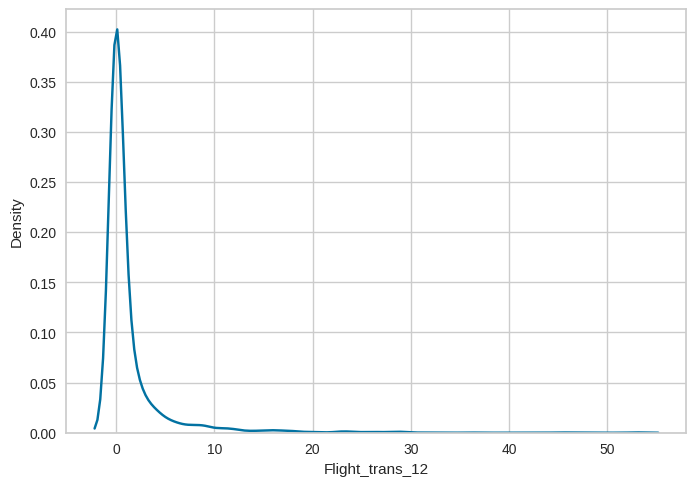

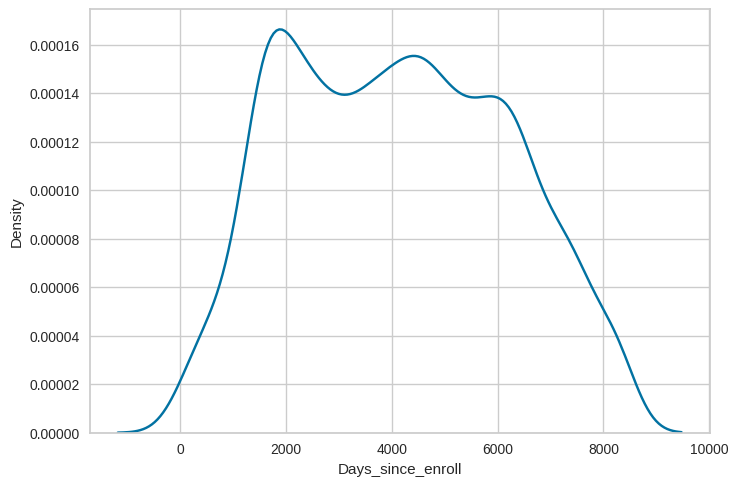

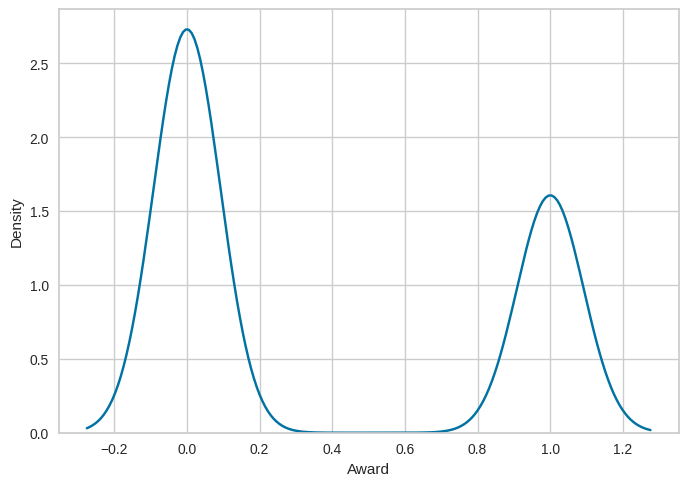

In [ ]:
#Ploting curve over to visualise DISTRIBUTION
#KERNEL DENSITY - a smoothly curved surface is fitted over each point.
# Kernel Density for each feature
for j in data.columns:
  if j !='ID':
    print('\n')
    sns.kdeplot(data[j])
    plt.show()

CONCLUSION:
 - since most of feature are not normal distribusted , hence we cant use GAUSSIAN MIX MODEL FOR CLUSTERING

 - and go ahead with
 KMEAN , DBSCAN AND HIRERACY

OULIERS ANALYSIS

<Axes: xlabel='Days_since_enroll'>

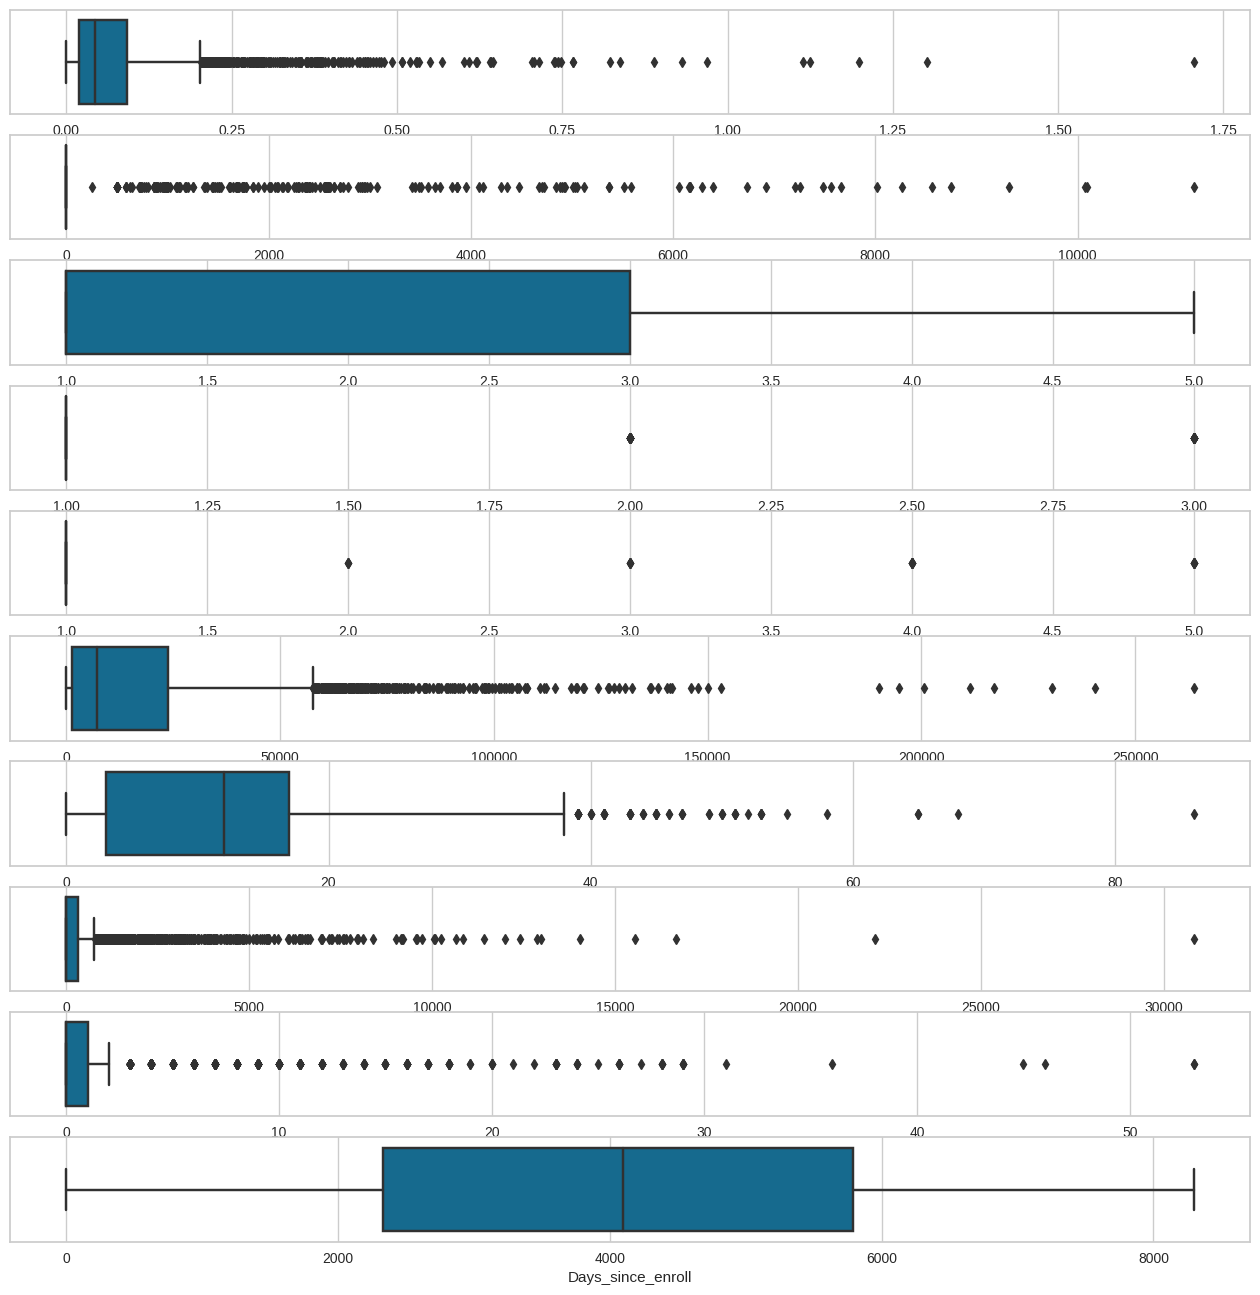

In [ ]:
data1=data.copy()
fig, axes=plt.subplots(10,1,figsize=(16,16))
sns.boxplot(x='Balance',data=data1,ax=axes[0])
sns.boxplot(x='Qual_miles',data=data1,ax=axes[1])
sns.boxplot(x='cc1_miles',data=data1,ax=axes[2])
sns.boxplot(x='cc2_miles',data=data1,ax=axes[3])
sns.boxplot(x='cc3_miles',data=data1,ax=axes[4])
sns.boxplot(x='Bonus_miles',data=data1,ax=axes[5])
sns.boxplot(x='Bonus_trans',data=data1,ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=data1,ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=data1,ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=data1,ax=axes[9])

<Axes: >

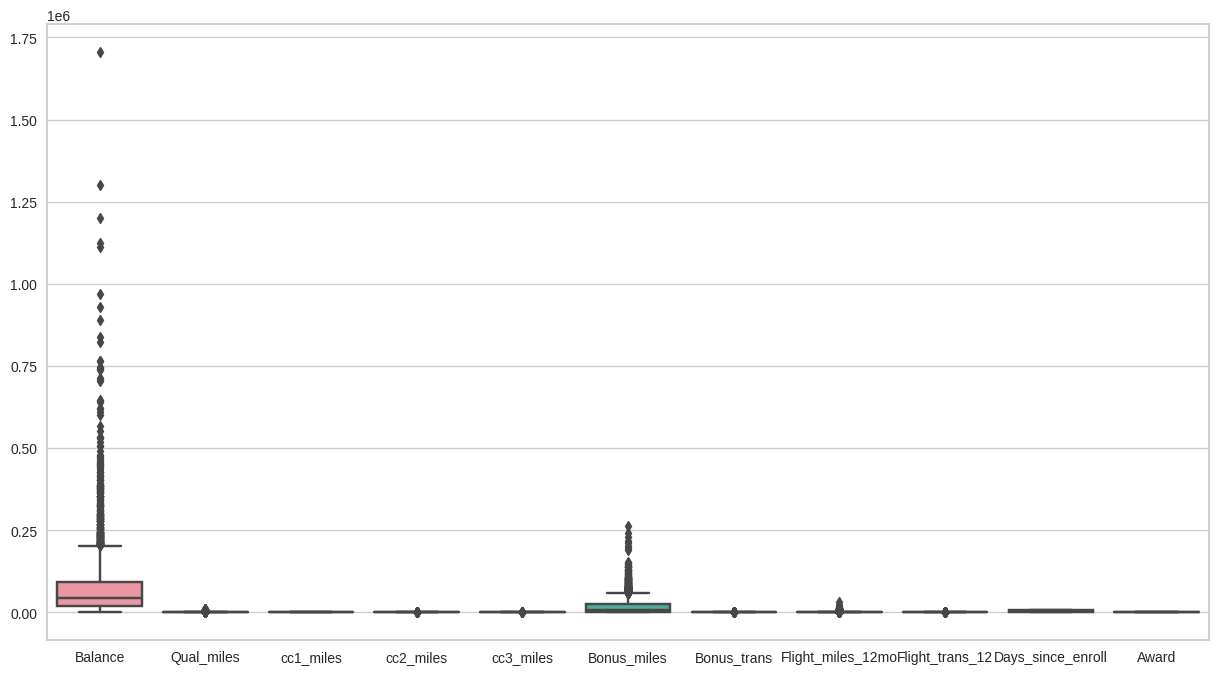

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data1)

Outlier are not


<Axes: >

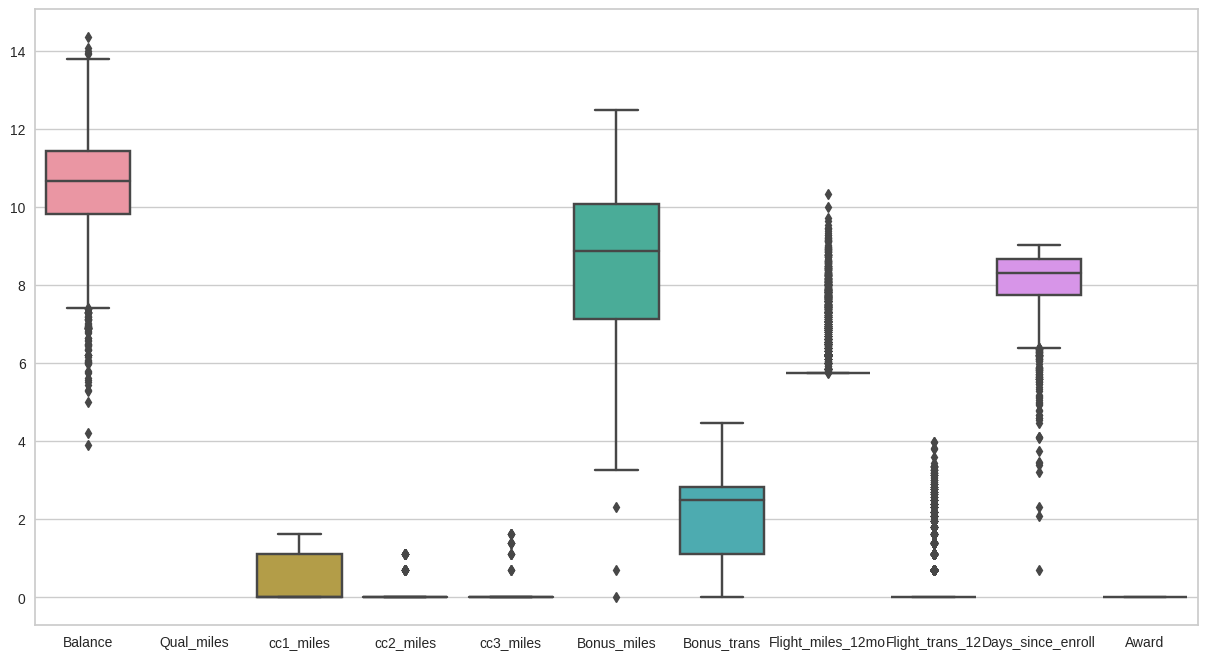

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=np.log(data1))

<Axes: >

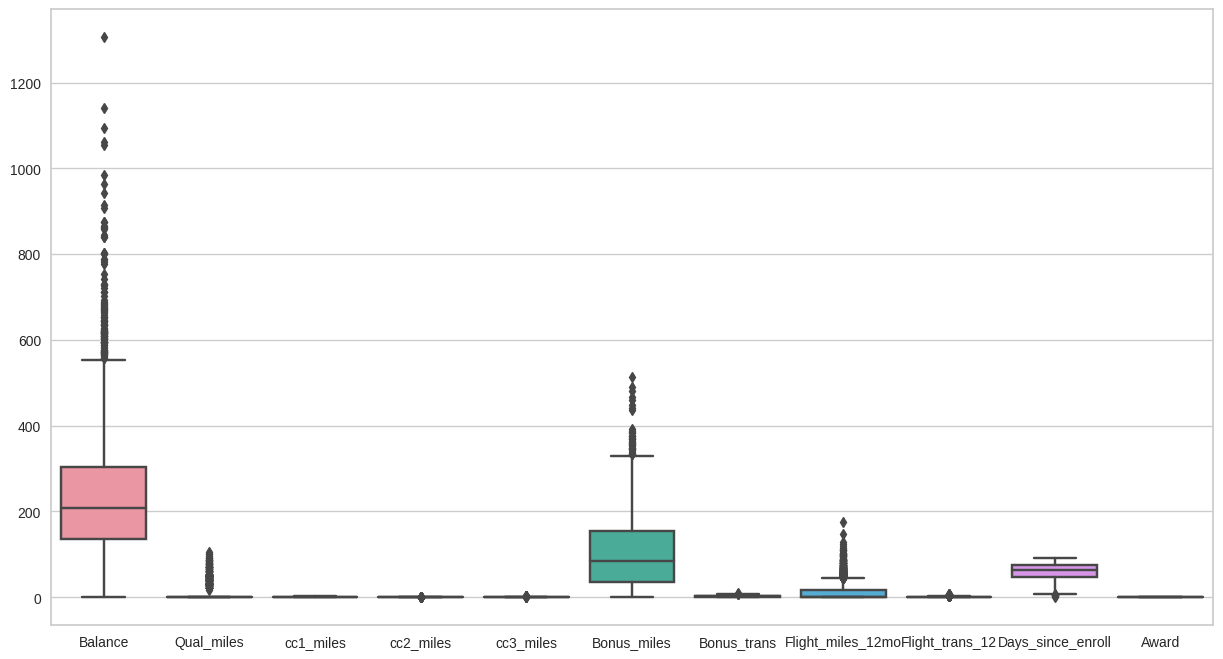

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=np.sqrt(data1))

data is right skewed

UNIVARIATE ANALYSIS
---
Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression ) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

LETS ANALYSIS THE LOYALITY REWARDS

 loyalty programs?
- offered by airlines and credit cards for frequent cilents

features in focus
- awards - status
- balance - Number of miles eligible for award travel
- cc miles -number of miles earned with freq. flyer credit card

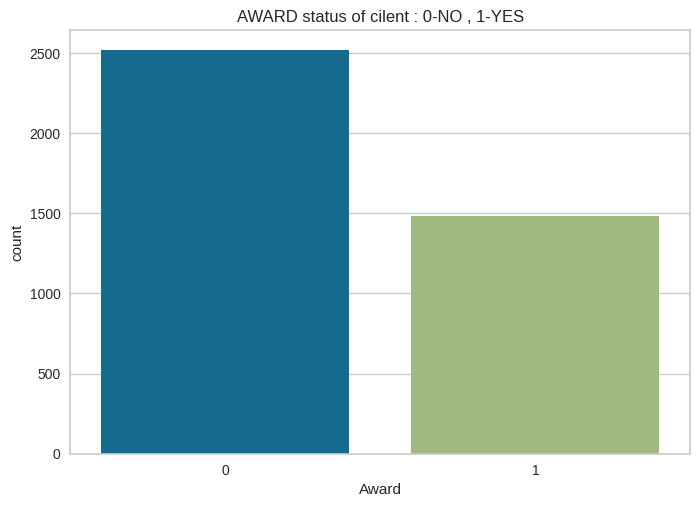

In [ ]:
#AWARD
sns.countplot(x='Award', data=data,order=data['Award'].value_counts().index)
plt.title('AWARD status of cilent : 0-NO , 1-YES')
plt.show()

In [ ]:
a = len(data[data.Award == 0])
b = len(data[data.Award == 1])
print("Percentage of Customer doesn't have a Award = {:.2f}%".format((a/ (len(data.Award))*100)))
print("Percentage of Customer does have a Award = {:.2f}%".format((b / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award = 62.96%
Percentage of Customer does have a Award = 37.04%


Lets analyize BALANCE with AWARD status

HYPOTHESIS : more balance more probability if getting award

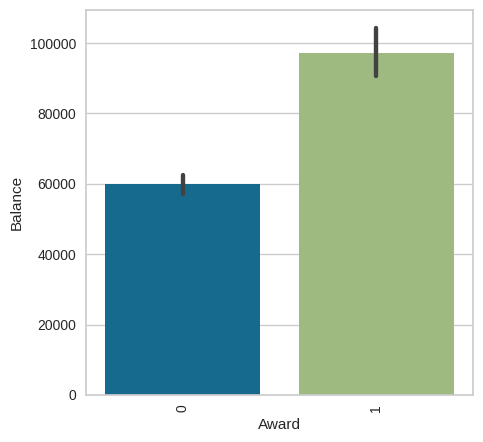

In [ ]:
plt.figure(figsize = (5,5))
dtemp = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data=dtemp)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

conclusion : yes its true that people with more balance have award

therefore testing correlation with respect to balance

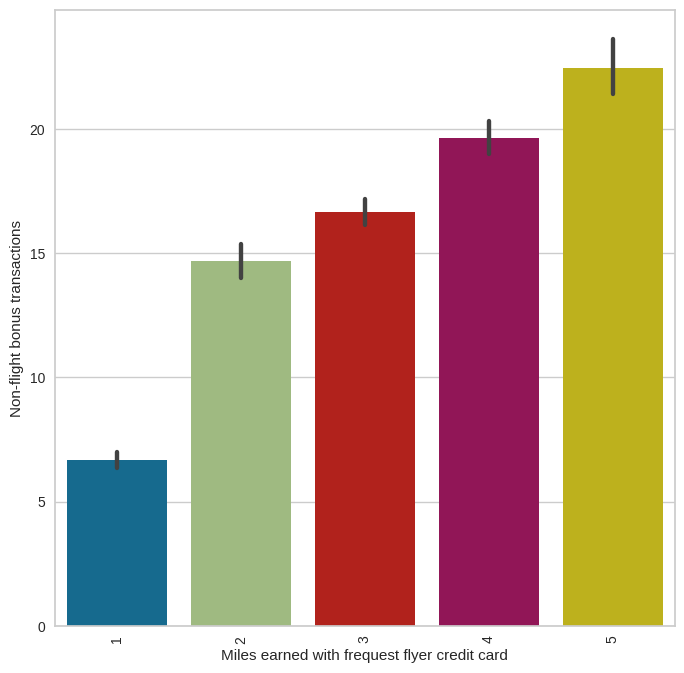

In [ ]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions
plt.figure(figsize = (8,8))

#let temp dataframe
dtemp = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)

#ploting
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= dtemp)
ax.set(xlabel = 'Miles earned with frequest flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

CORRELATION ANLAYSIS
---

In [ ]:
data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


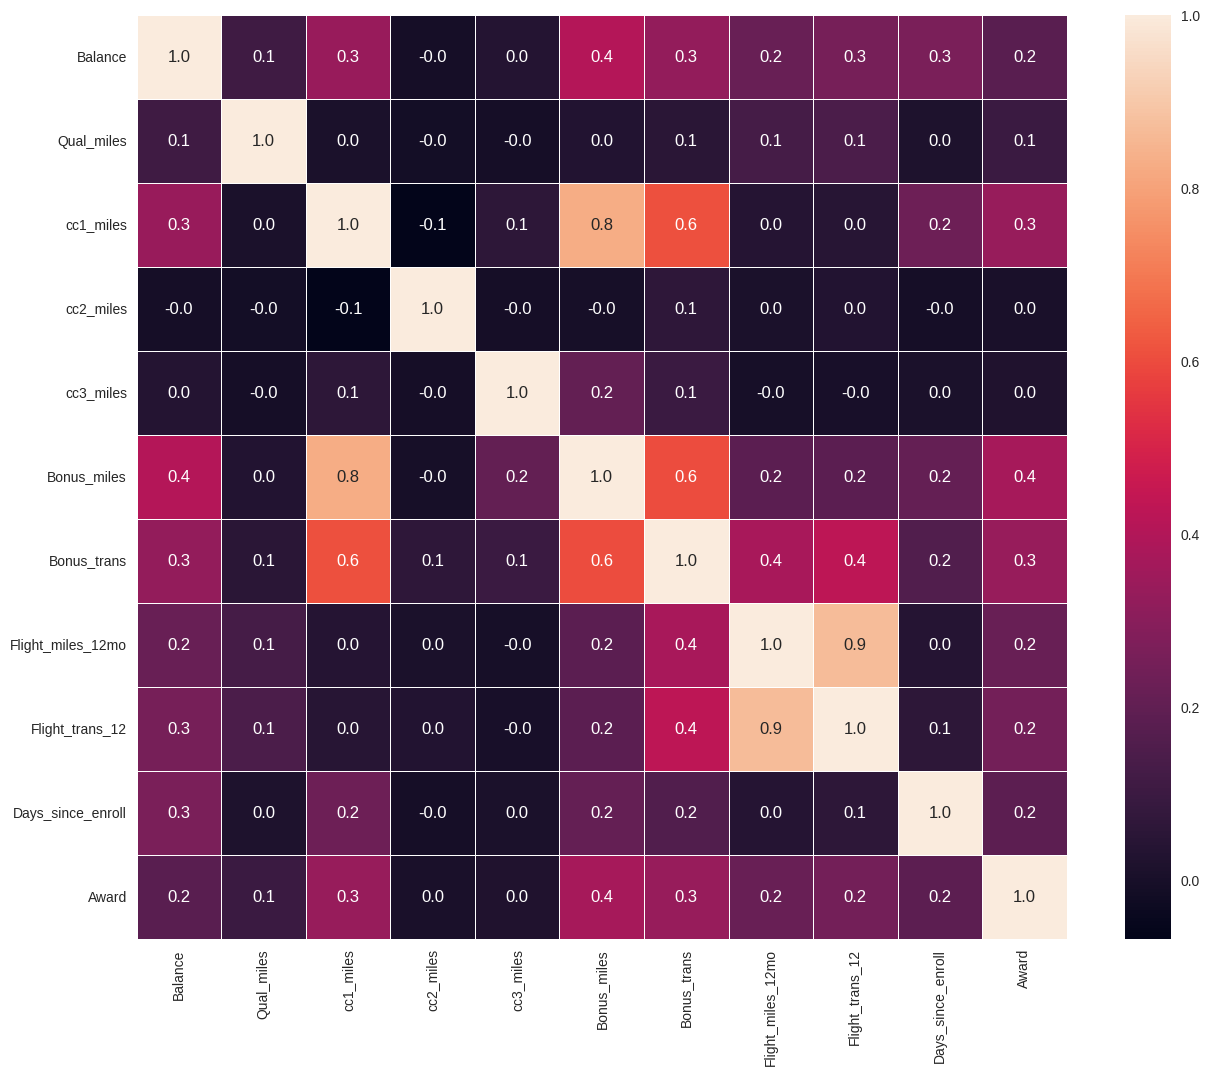

In [ ]:
#Visualizing corr with heatmap

f,ax = plt.subplots(figsize=(15,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Conclusion :  

- **bonus_trans and cc1_miles** have positive correlation
- **bonus_trans and bonus_miles** have positive correlation
- **bonus_miles and cc1_miles** have positive correlation
- **flight_trans_12 and flight_miles_12mo** have positive correlation

NOTE

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months

In [ ]:
# correlation with respect to Bonus_trans
corr_matrix = data.corr()
corr_matrix["Bonus_trans"].sort_values(ascending=False)

Bonus_trans          1.000000
cc1_miles            0.608867
Bonus_miles          0.603114
Flight_trans_12      0.432341
Flight_miles_12mo    0.377190
Award                0.333747
Balance              0.324797
Days_since_enroll    0.160953
cc3_miles            0.097312
cc2_miles            0.064381
Qual_miles           0.050678
Name: Bonus_trans, dtype: float64

In [ ]:
# correlation with respect to Bonus_miles
corr_matrix = data.corr()
corr_matrix["Bonus_miles"].sort_values(ascending=False)

Bonus_miles          1.000000
cc1_miles            0.825177
Bonus_trans          0.603114
Balance              0.403410
Award                0.373421
Days_since_enroll    0.210232
cc3_miles            0.204136
Flight_trans_12      0.185211
Flight_miles_12mo    0.183492
Qual_miles           0.030990
cc2_miles           -0.003987
Name: Bonus_miles, dtype: float64

THAT IS

- **bonus_trans and cc1_miles** have positive correlation
- **bonus_trans and bonus_miles** have positive correlation

DATA PREPROCESSING
----

- Scaling dataset

 - min max
 - standard scaler

In [ ]:
#Minmax scaler
minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3998, 11)

As we know some model are sensitive toward SCALING , Hence using two scales to compare accuracy

In [ ]:
#Standard Scaling
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3998, 11)

MODEL

K-MEAN
-----

- It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties.
- It is a centroid-based algorithm, where each cluster is associated with a centroid.
- The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.


steps

- Data Pre-processing
- Finding the optimal number of clusters using the elbow method
- Training the K-means algorithm on the training dataset
- Visualizing the clusters

In [ ]:
#DATA PREPROCESS - ALREADY APPLIED SCALING (STANTARD SCALING AND MINMAX)

Method to find optimal k (no of clusters)

- Elbow method
- Variance explained
- BIC score
- Silhouette Score

ELBOW METHOD - he elbow method uses the WCSS concept to draw the plot by plotting WCSS values on the Y-axis and the number of clusters on the X-axis. So we are going to calculate the value for WCSS for different k values ranging from 1 to 10


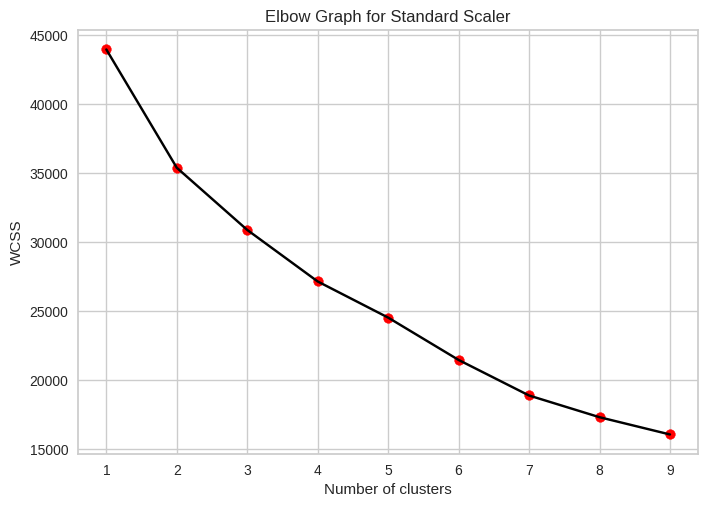

In [ ]:
#ELBOW METHOD
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,10),wcss,color = 'black')
plt.scatter(range(1,10),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

conclusion :
- not clear insight on optimal no of clusters
- k=3 or k=4
- hence using other method and converging values will be the optimal no of cluter

Variance Explained Method - The percentage of variance explained, or in other words F-test, is the ratio of group
variance to the total variance.

In [ ]:
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import euclidean_distances, silhouette_score

Text(0.5, 1.0, 'Elbow for KMeans clustering')

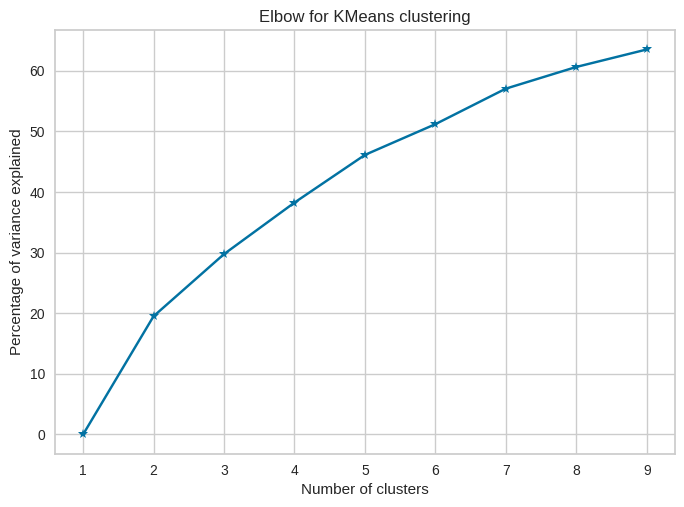

In [ ]:
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(std_df) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(std_df, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(std_df)**2)/std_df.shape[0]
bss = tss-wcss
kIdx = 10-1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

conclusion -

- hence optimal no of cluster k= 4 or k=5

Silouette Score


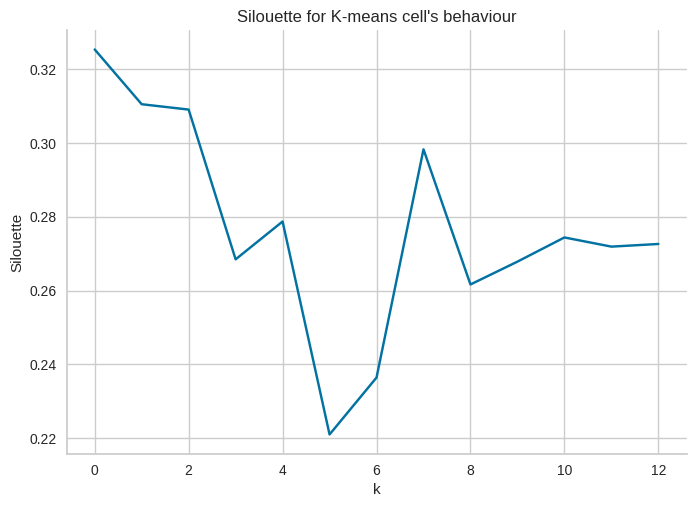

In [ ]:
s = []
for n_clusters in range(2,15):
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(std_df)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  s.append(silhouette_score(std_df, labels, metric='euclidean'))
plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

Conclusion-

- Silouette score is max for k=4
- therefore K= 4


CONLUSION

- applied all method to find optimal k
- BIC mehtod not use beacuse - data is multi-dimension
- ELBOW METHOND - k= 3 or 4
- VARIANCE EXPLAINED - k=4
- Silouette score is max for k=4


HENCE K=OPTIMAL NO OF CLUSTER = 4

OPTIMAL MEANS
- MAX DISTANCE IN-BETWEEN CLUSTERS
- MINIMUM DISTANCE WITH-IN CLUSTER

Building KMeans Cluster algorithm using K=4 and Standard Scaler Applied


In [ ]:
model_kmeans = KMeans(n_clusters=4, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(std_df)
y_predict_kmeans.shape

(3998,)

In [ ]:
#cluster labesls
y_predict_kmeans

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [ ]:
model_kmeans.labels_

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [ ]:
# cluster centres associated with each lables
model_kmeans.cluster_centers_

array([[ 1.19809216,  0.81988169,  0.0622266 ,  0.14802825, -0.06277446,
         0.58246066,  1.59196169,  3.53129417,  3.79364128,  0.28283904,
         0.90206293],
       [-0.29175819, -0.06106965, -0.60356312,  0.03153285, -0.06077138,
        -0.51263719, -0.48367781, -0.18669227, -0.19890301, -0.2018646 ,
        -0.34839042],
       [ 0.63950059, -0.08446932,  1.02183982, -0.09825429, 15.64433492,
         3.1793166 ,  1.7144102 ,  0.0332068 ,  0.05959833,  0.2395819 ,
         0.33731815],
       [ 0.42723868,  0.01755881,  1.20358121, -0.08214144, -0.05465093,
         0.9254699 ,  0.75208114, -0.08389334, -0.09377462,  0.36947312,
         0.58440457]])

In [ ]:
model_kmeans.inertia_

27148.665385482615

In [ ]:
#Assign clusters to the data set
df = data.copy()

In [ ]:
df['Kmeans_label'] = model_kmeans.labels_
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [ ]:
# Group data by Clusters mean
df.groupby('Kmeans_label').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,
0,194350.181818,778.460606,2.145455,1.036364,1.000000,31215.236364,26.890909,5404.654545,15.763636,4703.181818,0.806061
1,44157.999608,97.017228,1.226703,1.019186,1.000392,4751.874315,6.951840,198.999608,0.620204,3701.520752,0.202428
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,116623.795095,157.360759,3.715190,1.002373,1.001582,39451.361551,18.815665,341.890823,1.015823,4881.016614,0.651108


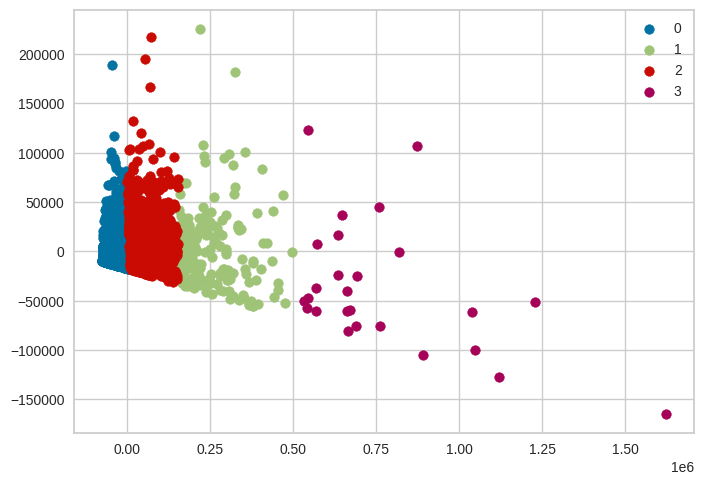

In [ ]:
df1=data.copy()

from sklearn.decomposition import PCA
pca = PCA(2)

#Transform the data
df2 = pca.fit_transform(df1)

#Initialize the class object
kmeans = KMeans(n_clusters= 4)

#predict the labels of clusters.
label = kmeans.fit_predict(df2)

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1]  , label = i)
plt.legend()
plt.show()

conclusion - as we know kmean is sensitive to outliers


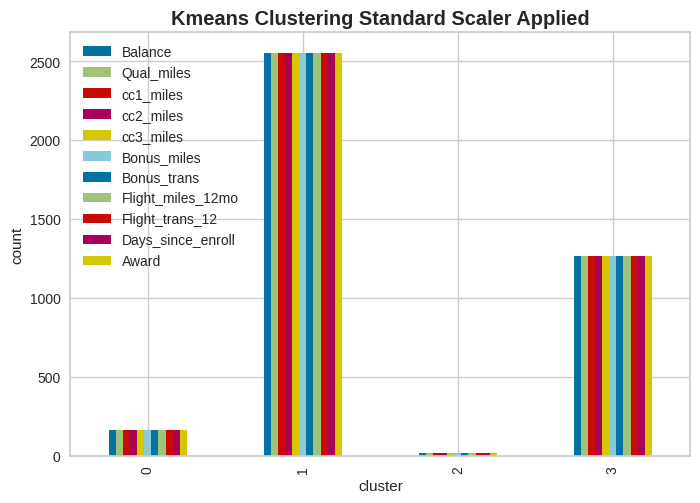

In [ ]:
df.groupby(['Kmeans_label']).count().plot(kind='bar')
plt.title('Kmeans Clustering Standard Scaler Applied',fontsize='large',fontweight='bold')
plt.xlabel('cluster')
plt.ylabel('count')
plt.show()

K-MEAN on MinMaxScaler

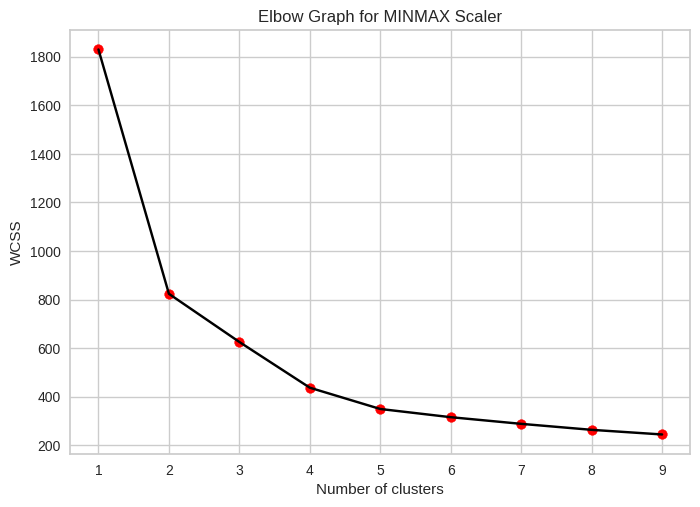

In [ ]:
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(minmax_df)
    wcss.append(kmeans.inertia_)

# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,10),wcss,color = 'black')
plt.scatter(range(1,10),wcss,color='red')
plt.title('Elbow Graph for MINMAX Scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

conclusion : by elbow method no of cluster =

- k=2
- or k=3

Text(0.5, 1.0, 'Elbow for KMeans clustering')

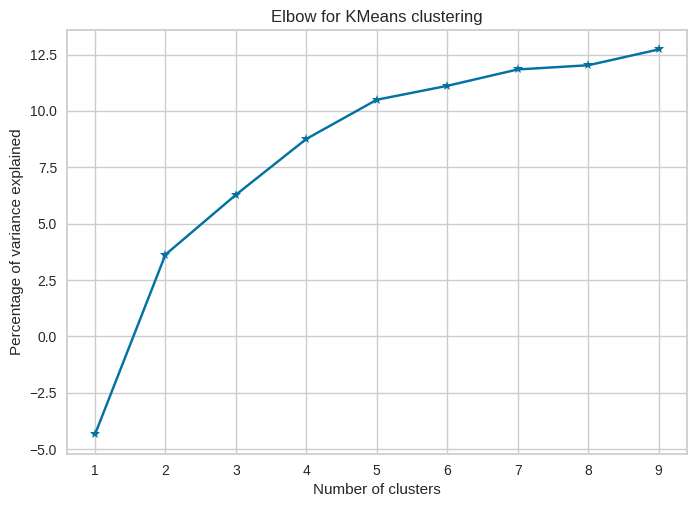

In [ ]:
#EXPLAINED VARIANCE ELBOW
K = range(1,10)
KM = [KMeans(n_clusters=k).fit(minmax_df) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(std_df, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(std_df)**2)/std_df.shape[0]
bss = tss-wcss
kIdx = 10-1
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

conclusion k= 2

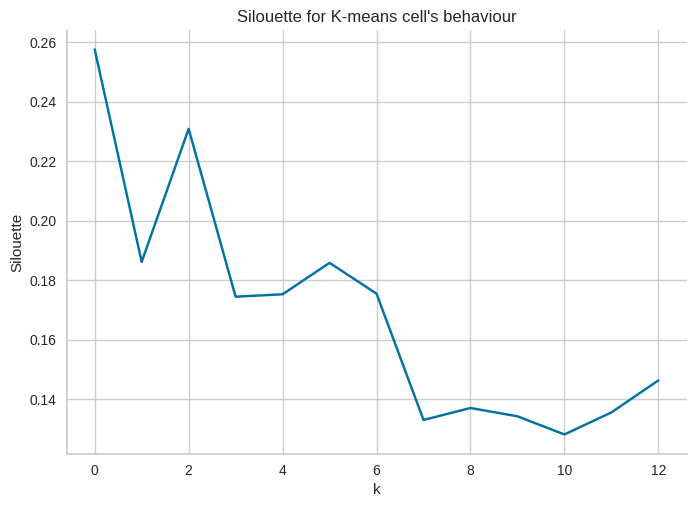

In [ ]:
# Silouette score for k
s = []
for n_clusters in range(2,15):
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(minmax_df)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  s.append(silhouette_score(std_df, labels, metric='euclidean'))
plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
sns.despine()

CONCLUSION , Hence

applied all method to find optimal k
- BIC mehtod not use because - data is multi-dimension
- ELBOW METHOND - k= 2 or 3
- VARIANCE EXPLAINED - k=2
- Silouette score is max for k=2

K=2 , no of cluster




Building KMeans Cluster algorithm using K=4 and MINMAX Scaler Applied

In [ ]:
model_kmeans2 = KMeans(n_clusters=2, random_state=0, init='k-means++')
y_predict_kmeans2 = model_kmeans2.fit_predict(minmax_df)
y_predict_kmeans2.shape

(3998,)

In [ ]:
#model analysis
y_predict_kmeans2

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [ ]:
df_minmax=data.copy()
df_minmax['Kmeans_label'] = model_kmeans2.labels_
df_minmax.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


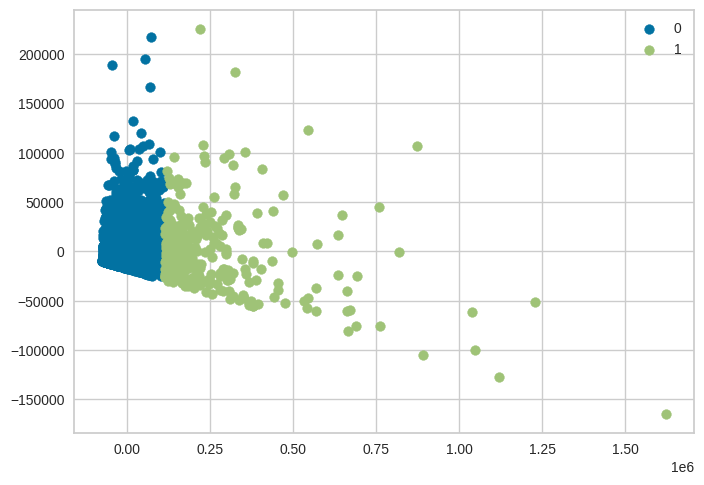

In [ ]:
#viualizing cluster

pca = PCA(2)

#Transform the data
df_minmax1 = pca.fit_transform(df_minmax)

#Initialize the class object
kmeans = KMeans(n_clusters= 2)

#predict the labels of clusters.
label = kmeans.fit_predict(df_minmax1 )

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df_minmax1 [label == i , 0] , df_minmax1[label == i , 1]  , label = i)
plt.legend()
plt.show()

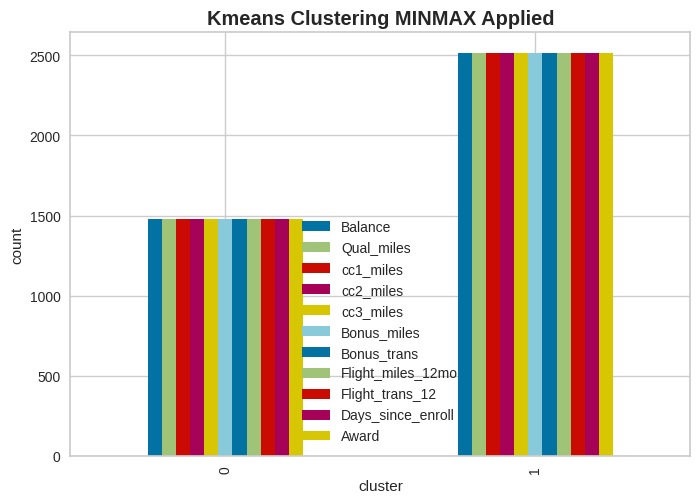

In [ ]:
df_minmax.groupby(['Kmeans_label']).count().plot(kind='bar')
plt.title('Kmeans Clustering MINMAX Applied',fontsize='large',fontweight='bold')
plt.xlabel('cluster')
plt.ylabel('count')
plt.show()

DBSCAN - Density Based Spatial Clustering
-----

Density-Based Spatial Clustering Of Applications With Noise (DBSCAN)

- Clusters are dense regions in the data space, separated by regions of the lower density of points.
- The DBSCAN algorithm is based on this intuitive notion of “clusters” and “noise”.
- The key idea is that for each point of a cluster, the neighborhood of a given radius has to contain at least a minimum number of points.


Parameters Required For DBSCAN Algorithm

eps: It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered neighbors.
- If the eps value is chosen too small then a large part of the data will be considered as an outlier.
- If it is chosen very large then the clusters will merge and the majority of the data points will be in the same clusters.
-One way to find the eps value is based on the k-distance graph.

MinPts: Minimum number of neighbors (data points) within eps radius.
- The larger the dataset, the larger value of MinPts must be chosen.
- As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.

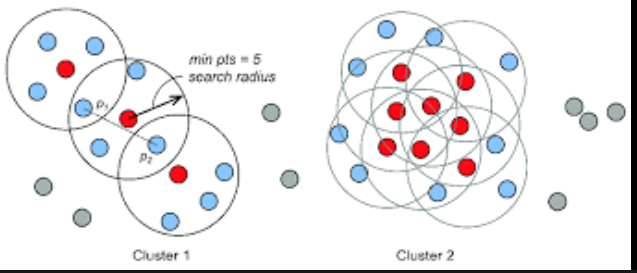

Evaluation Metrics For DBSCAN Algorithm In Machine Learning

- Silhouette score and Adjusted rand score for evaluating clustering algorithms.
- Silhouette’s score is in the range of -1 to 1. A score near 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters.
- Absolute Rand Score is in the range of 0 to 1. More than 0.9 denotes excellent cluster recovery, and above 0.8 is a good recovery. Less than 0.5 is considered to be poor recovery.

In [ ]:
#STEP 1 - finding optimal value of EPS and MinPOINT

# eps values to be investigated
eps_values = np.arange(0.15,4,0.25)

# min_samples values to be investigated
#minpoint >=3
min_samples = np.arange(3,30)

DBSCAN_params = zip(eps_values, min_samples)

In [ ]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

In [ ]:
temp=pd.DataFrame({'no_of_clusters':no_of_clusters,'sil_score':sil_score})
temp

,no_of_clusters,sil_score
0,52,-0.524196
1,33,-0.235519
2,19,0.002837
3,6,0.161718
4,6,0.217790
5,5,0.247686
6,4,0.251060
7,4,0.254536
8,3,0.536747
9,3,0.541224


conclusion : no of cluster = 3

In [ ]:
# eps values to be investigated
epsilon = np.arange(0.15,4,0.25)

# min_samples values to be investigated
#minpoint >=3
min_samples = np.arange(3,30)
sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 3.9 
min_sample= 27 
number of clusters= 1 
average silhouette score= 0.6900


In [ ]:
dbscan = DBSCAN(eps=3.9, min_samples=27)
dbscan.fit(std_df)

DBSCAN(eps=3.9, min_samples=27)

MODEL ANALYSIS

In [ ]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
df_dbscan=data.copy()
#putting label in dataset
df_dbscan['DBSCAN_labels'] = dbscan.labels_
df_dbscan.head()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,DBSCAN_labels
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [ ]:
df_dbscan.groupby('DBSCAN_labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,
-1,199799.480000,1059.310000,2.240000,1.58,1.49,47518.280000,24.640000,3062.570000,7.950000,4593.950000,0.630000
0,70382.442535,120.672909,2.055156,1.00,1.00,16370.038994,11.270395,393.408415,1.205233,4107.010518,0.363776


<Axes: xlabel='DBSCAN_labels'>

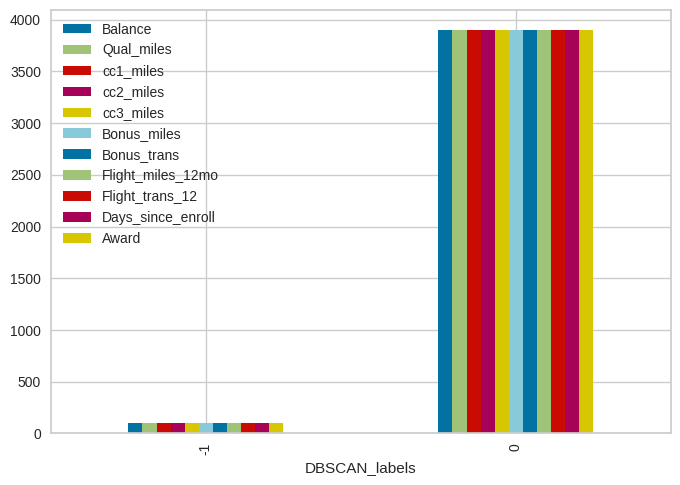

In [ ]:
# Plotting barplot

df_dbscan.groupby(['DBSCAN_labels']).count().plot(kind='bar')


In [ ]:
#NOISE %AGE
(len(df_dbscan[df_dbscan['DBSCAN_labels']==-1])/len(df))*100

2.501250625312656

conclusion:

- no of cluster formed - 1
- noise pt = 2%

DBSCAN on minmax scaled data , check if noise occurs in that too and how many %age of noise

In [68]:
epsilon = [0.25,0.5,0.75,1]
min_samples = [11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(minmax_df)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(minmax_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0],
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 1 
min_sample= 11 
number of clusters= 2 
average silhouette score= 0.5359


building DBSCAN model for eps=1 and minpt=11

In [69]:
dbscan1 = DBSCAN(eps=1, min_samples=11)
dbscan1.fit(minmax_df)

DBSCAN(eps=1, min_samples=11)

In [70]:
#model analysis
dbscan1.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [73]:
df_dbscan1=data.copy()
df_dbscan1['DBSCAN_labels'] = dbscan1.labels_
df_dbscan1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,DBSCAN_labels
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


<Axes: xlabel='DBSCAN_labels'>

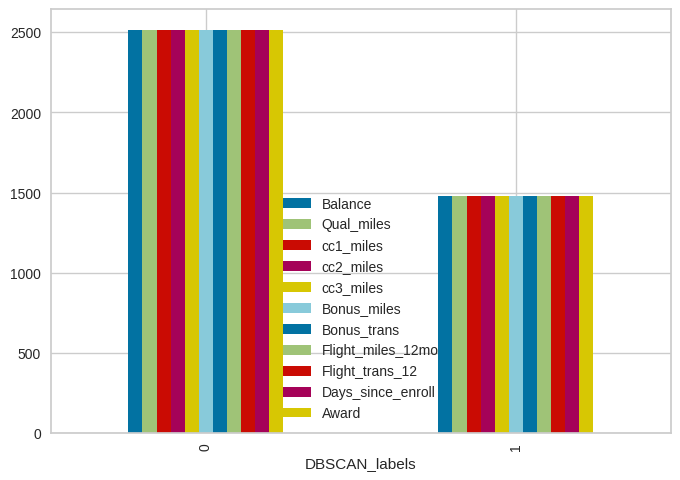

In [74]:
# Plotting barplot

df_dbscan1.groupby(['DBSCAN_labels']).count().plot(kind='bar')

CONCLSUION - minmax scaled data have less noise point that standard scaled data when fitted to DBSCAN algo

Hierarchical Clustering Algorithm
------

- Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.
- In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram

approaches:
- Agglomerative: Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.
- Divisive: Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.


Measure for the distance between two clusters - **Linkage methods**

- single
- complete
- centriod
- average

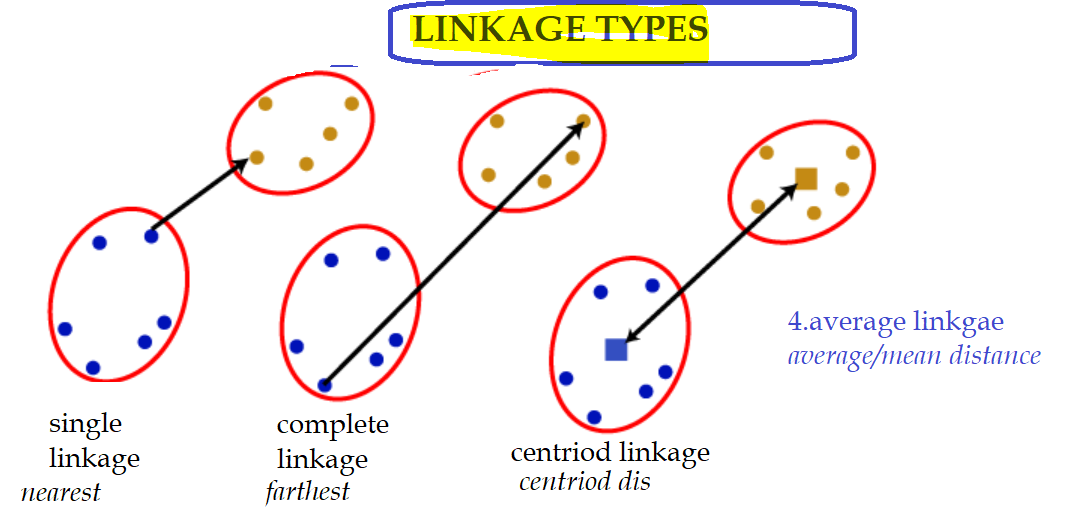

In [79]:
#choosing optimal linkage type and cluster number
#cluster list
n_clusters = [2,3,4,5,6,7,8]

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
      #model let h1
        h1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)

      #fitting standard scaled data first
        h1_labels = h1.fit_predict(std_df)
        silhouette_score1 = sil(std_df, h1_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.2891560488062143
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8110876003700274
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8110876003700274
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8562622335599249

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2939395016802131
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7760498283333268
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7838424148089893
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7350131896585496

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.308036175465823
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5985292155693238
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7730785441296635
For n_

conlusion : optimal no of cluster =2 with linkage - single


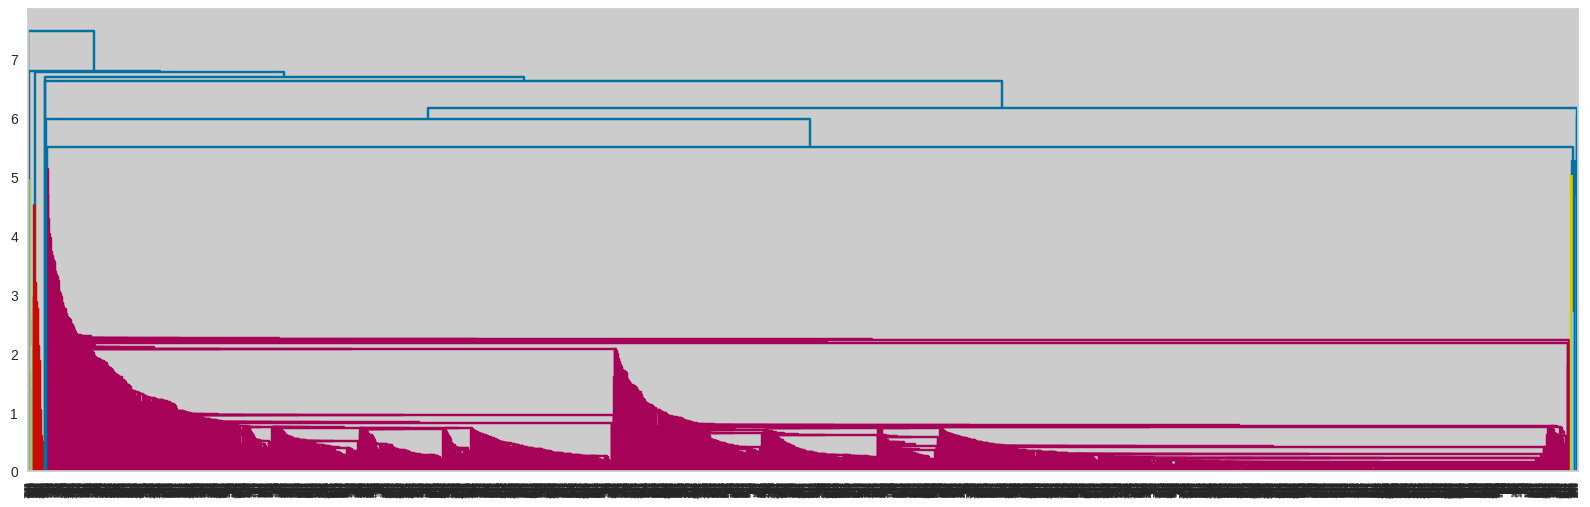

In [86]:
#visulaizing dendogram
plt.figure(figsize =(20, 6))
sch.dendrogram(sch.linkage(std_df, method ='single',optimal_ordering=False))
plt.show()

In [87]:
#building model

h1 = AgglomerativeClustering(n_clusters=2,linkage='single')
 #fitting standard scaled data first
h1_labels = h1.fit_predict(std_df)


In [89]:
#model analysis
h1_labels

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
h1.n_clusters_

2

In [94]:
# putting labels with main dataset copy
df_h1=data.copy()

df_h1['Hierarchical_labels'] = h1.labels_
df_h1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical_labels
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


<Axes: xlabel='Hierarchical_labels'>

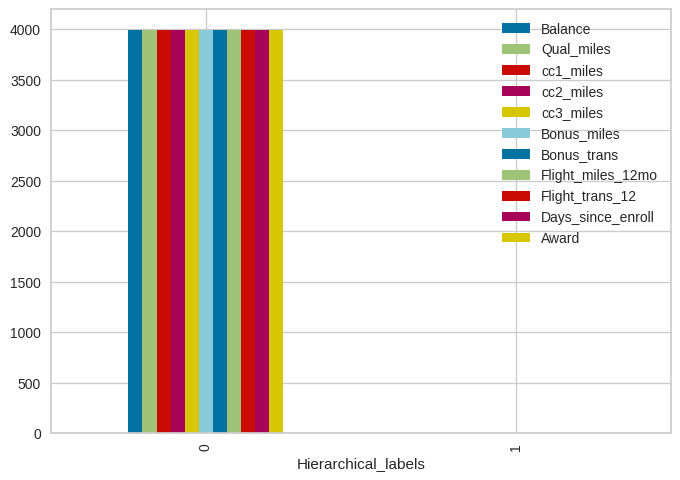

In [96]:
# Plotting barplot
df_h1.groupby(['Hierarchical_labels']).count().plot(kind='bar')

conclusion : model clustered whole data in 1 cluster

- falied for standard scaled data

lets try minmax sclaed data

In [97]:
n_clusters = [2,3,4,5,6,7,8]

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
      #model let h1
        h2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages)

      #fitting standard scaled data first
        h2_labels = h2.fit_predict(minmax_df)
        silhouette_score2 = sil(minmax_df, h2_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535888544052936
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535888544052936

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4354523188194701
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318364582439801
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3961439228235289
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351186081149816

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42489181550394106
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4645451427805366
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5285595526639542
For n_

conlsution : lets choose clster no =2 with ward linkage

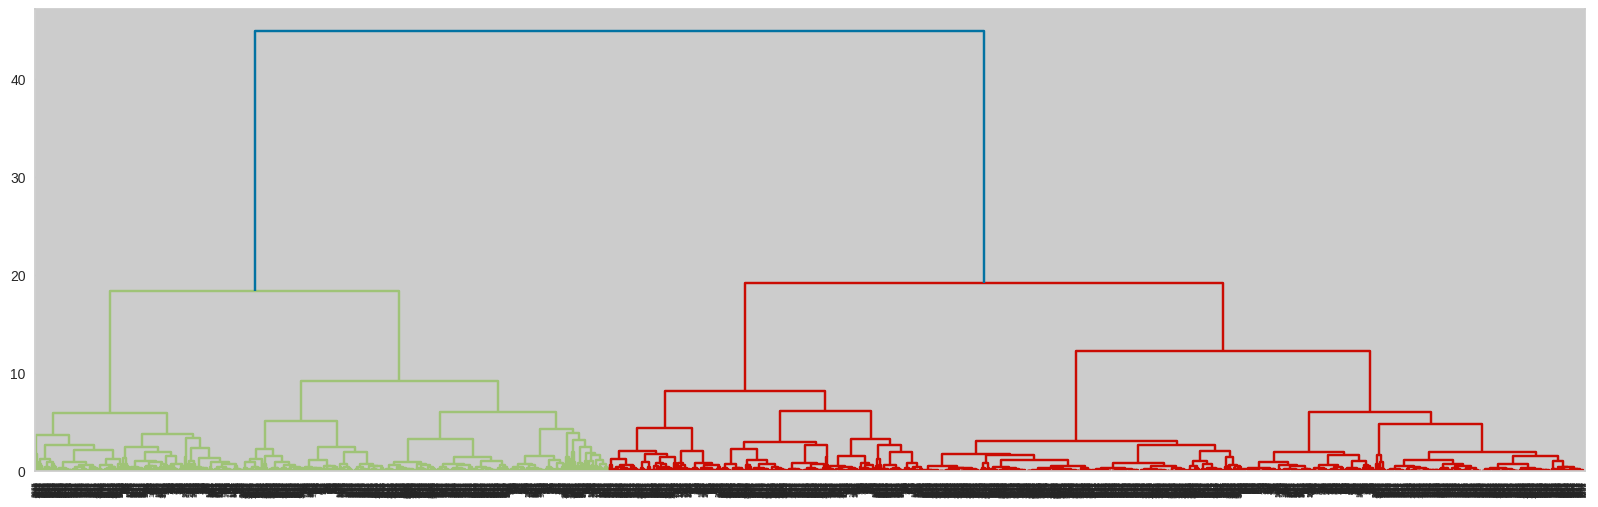

In [98]:
#visulaizing dendogram
plt.figure(figsize =(20, 6))
sch.dendrogram(sch.linkage(minmax_df, method ='ward',optimal_ordering=False))
plt.show()

In [99]:
#building model
h2 = AgglomerativeClustering(n_clusters=2,linkage='ward')
 #fitting standard scaled data first
h2_labels = h2.fit_predict(minmax_df)

In [100]:
# putting labels with main dataset copy
df_h2=data.copy()

df_h2['Hierarchical_labels'] = h2.labels_
df_h2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Hierarchical_labels
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


<Axes: xlabel='Hierarchical_labels'>

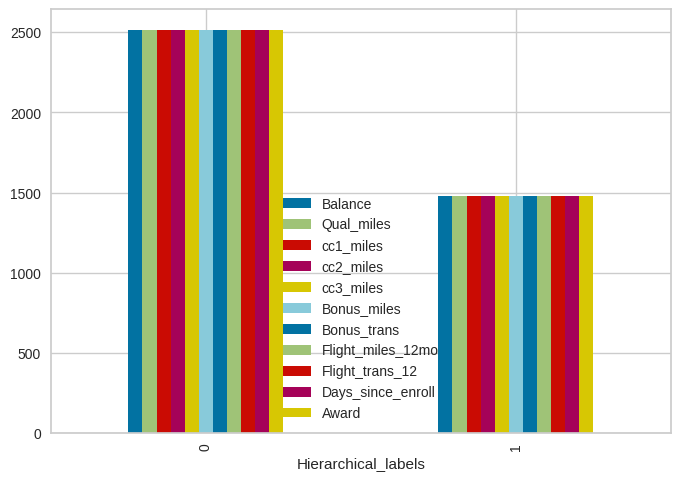

In [101]:
# Plotting barplot
df_h2.groupby(['Hierarchical_labels']).count().plot(kind='bar')

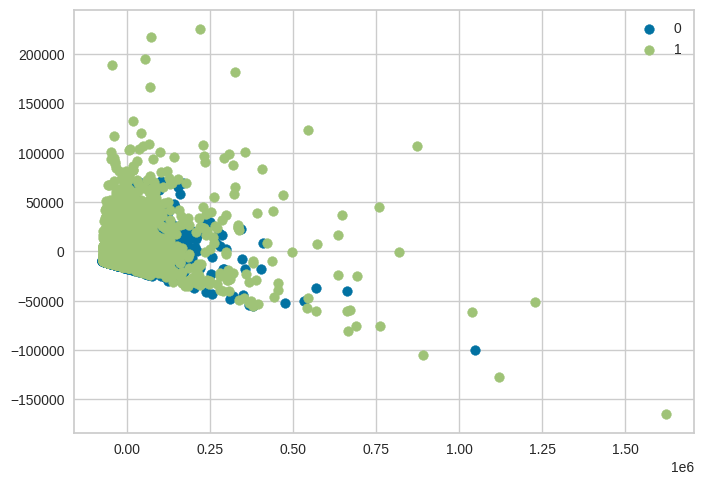

In [108]:
#viualizing cluster

pca = PCA(2)

#Transform the data
df_minmax1 = pca.fit_transform(df_minmax)

#Initialize the class object
h = AgglomerativeClustering(n_clusters=2,linkage='ward')
 #fitting standard scaled data first
h.fit_predict(minmax_df)

#predict the labels of clusters.
label = h.labels_

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df_minmax1 [label == i , 0] , df_minmax1[label == i , 1]  , label = i)
plt.legend()
plt.show()

conclusion - standard scaled perform poor as compared to minmax scaled data

HENCE USING

- minmax scaled data
- Dbscan

In [102]:
df_dbscan1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,DBSCAN_labels
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [103]:
cluster1 = pd.DataFrame(df.loc[df_dbscan1.DBSCAN_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df.loc[df_dbscan1.DBSCAN_labels==1].mean(),columns= ['Cluster2_avg'])

In [104]:
#calculating average
avg_df = pd.concat([cluster1,cluster2],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg
Balance,59831.203814,97053.051317
Qual_miles,87.637267,240.196489
cc1_miles,1.705602,2.661715
cc2_miles,1.013905,1.015530
cc3_miles,1.008741,1.018231
Bonus_miles,10231.752483,28905.414585
Bonus_trans,9.146603,15.782579
Flight_miles_12mo,226.382201,857.501013
Flight_trans_12,0.652761,2.599595
Days_since_enroll,3821.535558,4625.062120


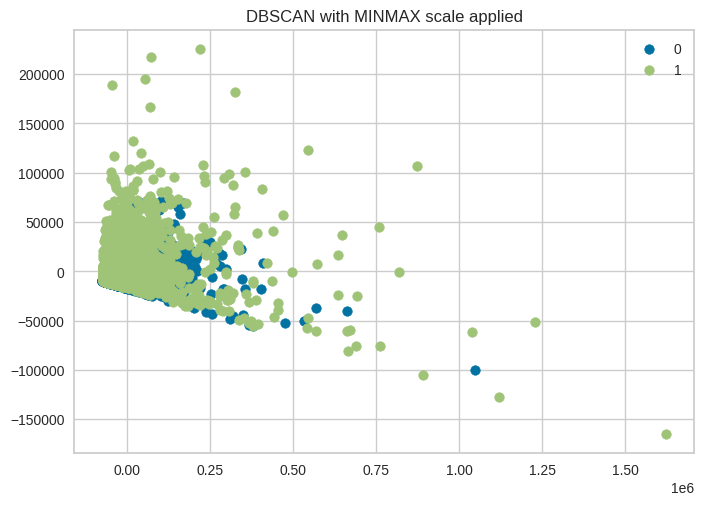

In [110]:
#viualizing cluster

pca = PCA(2)

#Transform the data
df_minmax1 = pca.fit_transform(df_minmax)

#Initialize the class object
dbscan = DBSCAN(eps=1, min_samples=11)
dbscan.fit(minmax_df)

#predict the labels of clusters.
label = dbscan.labels_

#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df_minmax1 [label == i , 0] , df_minmax1[label == i , 1]  , label = i)
plt.legend()
plt.title('DBSCAN with MINMAX scale applied')
plt.show()

# CASE STUDY SUMMARY

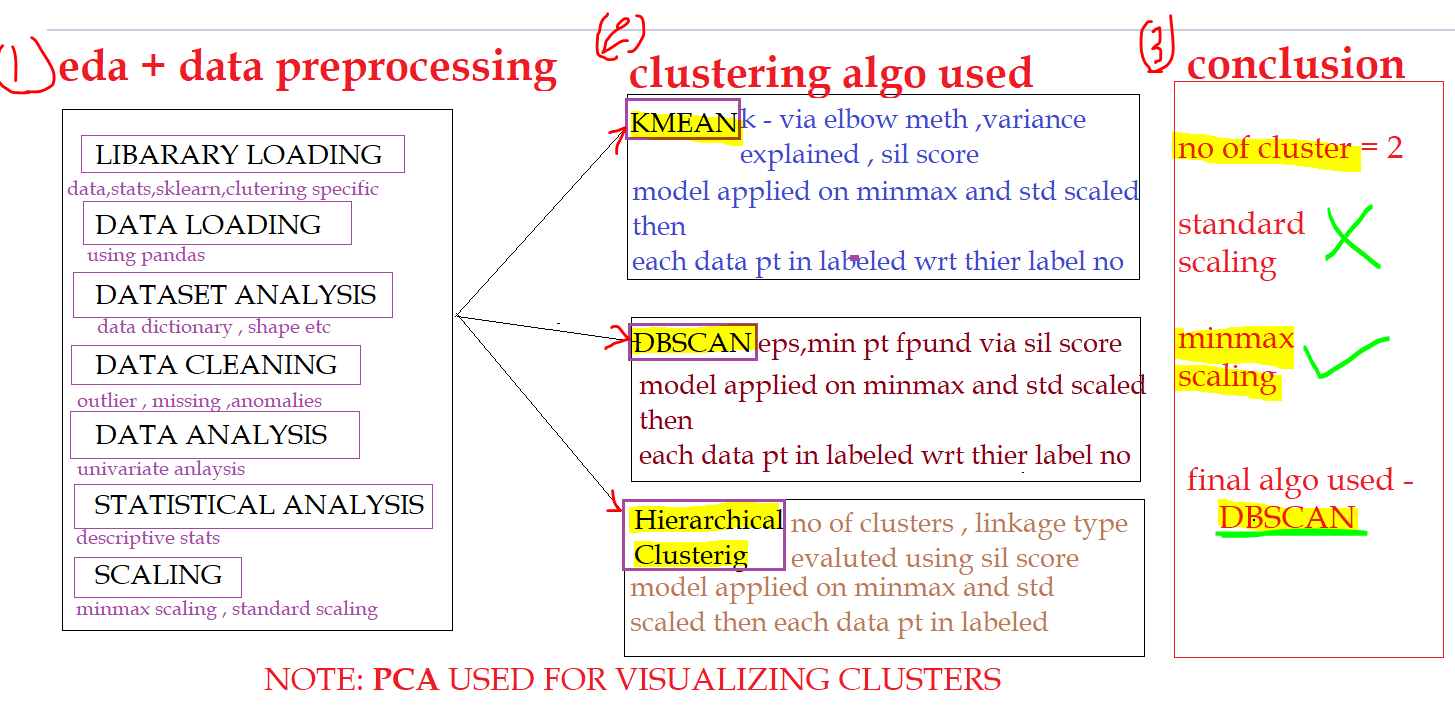